# Avanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

**2.a)** Load the dataset `penguins_size.csv`.

In [46]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
df = pd.read_csv(os.path.abspath('penguins_size.csv'))
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### **2.b)** Discard any row that has a missing value.

In [47]:
df = df.dropna(axis=0)

**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [48]:
df2 = df.iloc[:,[0,1,5,6]]
print(df2.groupby(['island','species','sex'])['body_mass_g'].count())

island     species    sex   
Biscoe     Adelie     FEMALE    22
                      MALE      22
           Gentoo     FEMALE    58
                      MALE      61
Dream      Adelie     FEMALE    27
                      MALE      28
           Chinstrap  FEMALE    34
                      MALE      34
Torgersen  Adelie     FEMALE    24
                      MALE      23
Name: body_mass_g, dtype: int64


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

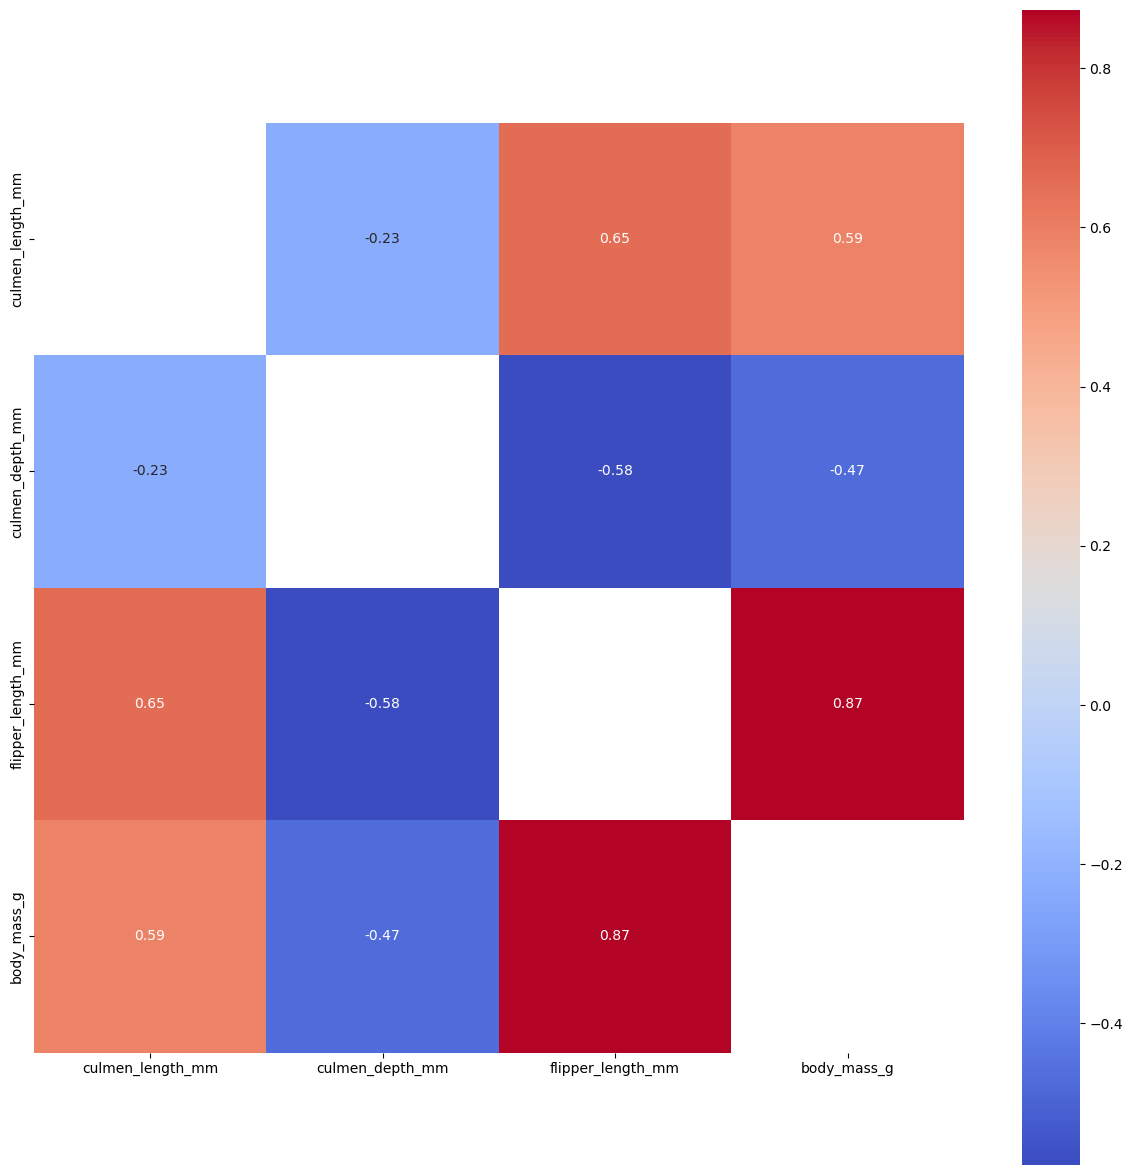

In [49]:
from scipy.stats import pearsonr
df_corrs = df.corr(numeric_only=True, method='pearson')
pval = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['flipper_length_mm'].values.reshape(-1, 1)
y = df['body_mass_g'].values.reshape(-1, 1)
regr = LinearRegression()
regr.fit(X, y)

print('body_mass_g = {:.4f} + {:.4f} * flipper_length_mm '.format(regr.intercept_[0], regr.coef_[0][0]))
medv_pred = regr.predict(X)
r2_value = r2_score(y, medv_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -5872.0927 + 50.1533 * flipper_length_mm 
R^2: 0.7621


**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

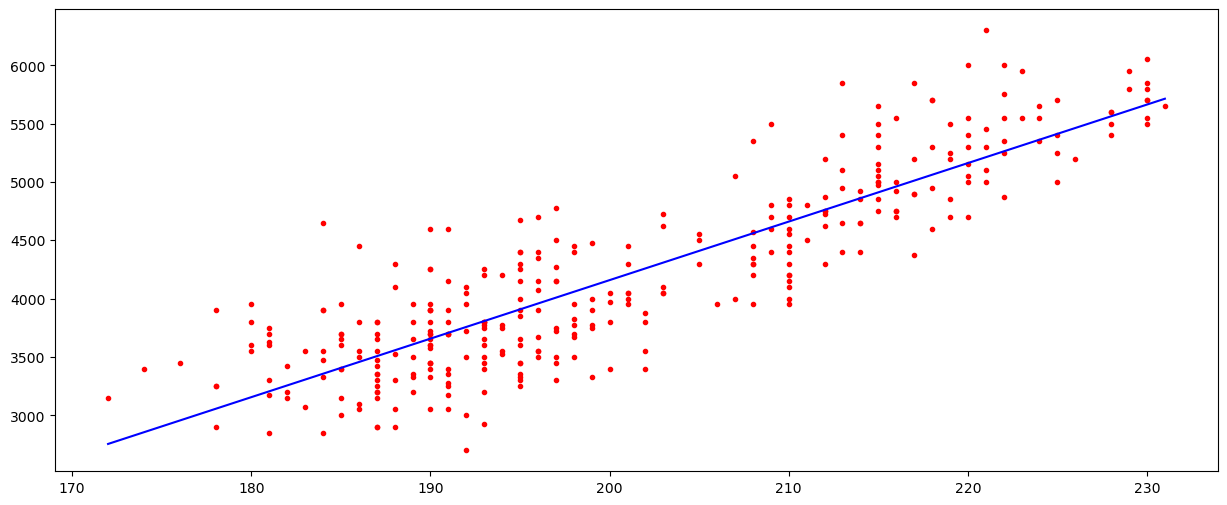

In [51]:
limits_flipper_length_mm = np.array([min(X), max(X)])
body_mass_g_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_flipper_length_mm
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['flipper_length_mm'], df['body_mass_g'], '.r')
plt.plot(limits_flipper_length_mm ,body_mass_g_vals, 'b-')
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [52]:
result_2g = regr.intercept_[0] + regr.coef_[0][0]*50
print(result_2g)

-3364.4293857307684


**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [53]:
cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']
X = df[cols].values
y = df['body_mass_g'].values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X,y)

print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1],regr.coef_[0][2]))

body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -6445.4760 + 3.2929 * culmen_length_mm + 17.8364 * culmen_depth_mm + 50.7621 * flipper_length_mm
R^2: 0.7639


**2.i)** Perform a multiple linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [54]:
# Converts non-numeric columns into separate boolean columns, for each different category
df_2i = pd.get_dummies(df,columns = ['species', 'island'],dtype=int)
df_2i['sex'] = (df_2i['sex'] == "MALE").astype(int)

# Define X and y for the regression
X = df_2i.drop(['body_mass_g'],axis=1).values
#X = df_2i.drop(['body_mass_g','species_Gentoo','island_Torgersen'],axis=1).values
y = df_2i['body_mass_g'].values.reshape(-1, 1)

# Initialize linear regression
regr = LinearRegression()
regr.fit(X,y)

# Print linear regression expression
print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm + {:.4f} * sex + {:.4f} * species_Adelie + {:.4f} * species_Chinstrap + {:.4f} * species_Gentoo + {:.4f} * island_Biscoe + {:.4f} * island_Dream + {:.4f} * island_Torgersen'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2], regr.coef_[0][3], regr.coef_[0][4], regr.coef_[0][5], regr.coef_[0][6], regr.coef_[0][7], regr.coef_[0][8], regr.coef_[0][9]))
#print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm + {:.4f} * sex + {:.4f} * species_Adelie + {:.4f} * species_Chinstrap + {:.4f} * island_Biscoe + {:.4f} * island_Dream'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2], regr.coef_[0][3], regr.coef_[0][4], regr.coef_[0][5], regr.coef_[0][6], regr.coef_[0][7]))

# R^2 calculation
body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -1277.9329 + 18.1893 * culmen_length_mm + 67.5754 * culmen_depth_mm + 16.2385 * flipper_length_mm + 387.2243 * sex + -242.4851 * species_Adelie + -502.7913 * species_Chinstrap + 745.2764 * species_Gentoo + 20.3889 * island_Biscoe + 7.2858 * island_Dream + -27.6747 * island_Torgersen
R^2: 0.8752


COMMENT: $R^2$ being greater than the previous one makes sense, since more variables are being used for the linear regression, akin to the effect an overfitting would have.

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

## Obtain the training indices


**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [55]:
from random import sample
import random
import statsmodels.api as sm
df_3 = pd.get_dummies(df,columns = ['species', 'island'],dtype=int)
df_3['sex'] = (df_3['sex'] == "MALE").astype(int)

test_size = 0.3     # Ratio of test dataset
seed = 100           # Random seed
random.seed(seed)    # Apply random seed
idxs_test = sample(range(df_3.shape[0]), int(test_size * df_3.shape[0]))  # Sample idxs for test datasets
idxs_train = [i for i in range(df_3.shape[0]) if i not in idxs_test]          # Obtain the remaining idxs as training

## Create the train and test datasets
df_train = df_3.iloc[idxs_train,:].copy()
df_test = df_3.iloc[idxs_test,:].copy()
print('Training set length:', len(df_train))
print('Test set length:', len(df_test))

Training set length: 234
Test set length: 99


**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Create input and output matrices
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Priors: {}'.format(model.priors_))
print('Means: {}'.format(model.means_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'MALE']
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 'MALE').copy()


Intercept: [-68.24448976]
Coefficients: [[ 0.36770085  1.48185728  0.04219803  0.00422558  3.11642153 -1.76800772
  -2.0853412  -0.18366075  0.33063287 -0.223887  ]]
Priors: [0.5042735 0.4957265]
Means: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     45  |  3
       Predicted MALE:      2  |  49

Success Rate: 94.95%
[]


**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Create input and output matrices
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Priors: {}'.format(model.priors_))
print('Means: {}'.format(model.means_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:     {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))


## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'Up']
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 'MALE').copy()


Priors: [0.5042735 0.4957265]
Means: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     14  |  10
       Predicted MALE:     33  |  42

Success Rate: 56.57%


C:\Users\pucag\miniconda3\envs\advanced-automation\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [58]:

## Create input and output matrices
#features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = LogisticRegression()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'MALE']
y_logistic_pred  = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 'MALE').copy()

Intercept: [-0.29615741]
Coefficients: [[ 0.18635618  0.73039259 -0.22082308  0.00574034  0.36185875 -0.47904486
  -0.17876188 -0.624066   -0.23046757  0.55858557]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     44  |  15
       Predicted MALE:      3  |  37

Success Rate: 81.82%


**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [59]:
from sklearn.naive_bayes import GaussianNB

## Create input and output matrices
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = GaussianNB()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Class Priors: {}'.format(model.class_prior_))
print('Sigma: {}'.format(model.var_))
print('Theta: {}'.format(model.theta_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'MALE']
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 'MALE').copy()


Class Priors: [0.5042735 0.4957265]
Sigma: [[2.42024695e+01 3.37303324e+00 1.57507149e+02 4.55684969e+05
  2.43503647e-01 1.67663371e-01 2.34526342e-01 2.50039125e-01
  2.29929961e-01 1.05253144e-01]
 [3.00956758e+01 3.58096120e+00 2.33520602e+02 6.76928880e+05
  2.47043993e-01 1.37650414e-01 2.39983945e-01 2.49496431e-01
  2.11372174e-01 1.37650414e-01]]
Theta: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     41  |  20
       Predicted MALE:      6  |  32

Success Rate: 73.74%


**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?


                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     36  |  21
       Predicted MALE:     11  |  31

Success Rate: 67.68%

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     33  |  22
       Predicted MALE:     14  |  30

Success Rate: 63.64%

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     44  |  14
       Predicted MALE:     3  |  38

Success Rate: 82.83%


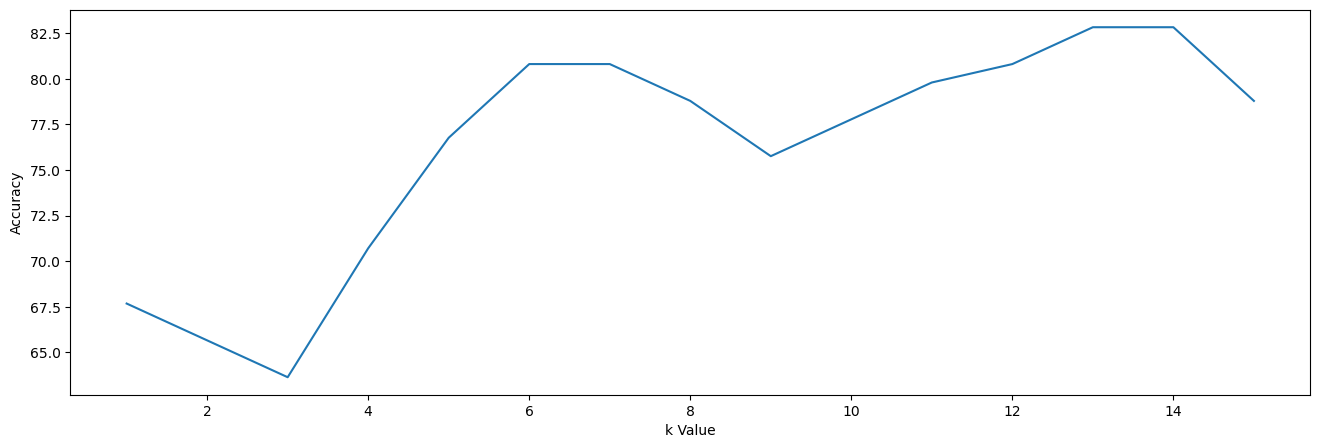

In [60]:
from sklearn.neighbors import KNeighborsClassifier

## Create input and output matrices
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):
    
    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    ## Predict the classification and print the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(35))
        print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
        print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
        print ('{}:     {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
    
    return model, accuracy_val
    
accuracies = []
knn_limit = 15

## Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 'MALE']
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 'MALE').copy()


model_k1, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=1, verbosity=1)
model_k3, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=3, verbosity=1)
model_k13, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=13, verbosity=1)

## Plot the results
plt.subplots(figsize=(16, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print(y_logistic_true)
print(y_logistic_pred)

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
[]


ValueError: Found array with 0 feature(s) (shape=(99, 0)) while a minimum of 1 is required.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented.

Randomly divide the data into $K$ equal-sized parts. We leave out the part $k$, fit the model to the other $K-1$ parts, and then obtain predictors for the left-out $k$th part.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

<u>Comparing with Validation set approach</u>:
- Advantages:
1. When it comes to *variance*, the validation set approach directly depends on the training set size that is arbitrarily chosen, which means that improper sizes may lead to higher variances than those of the k-Fold CV.
2. Regarding *suitability*, the model we get from the validation set approach is tuned for a randomly chosen ratio between training and test dataset sizes, making it highly circumstantial and thus not as suitable for new data as a model obtained from the k-Fold CV is.
- Disadvantages:
1. In regards to *computational demand*, while the k-Fold CV computes k trainings and k tests (leading to k models), the validation set approach only performs each of those once, making it computationally less demanding than the former.

<u>Comparing with Leave One Out Cross-Validation</u>:
- Advantages:
1. When it comes to *variance*, k-Fold CV yields lower values than those of LOOCV. Due to the nature of the LOOCV method, training data is highly correlated between itself, which may lead to test errors with a high variance.
2. In regards to *computational demand*, k-Fold CV performs k trainings and tests, whereas LOOCV will perform these for each data point in our dataset. Thus, k-Fold CV has a lower computational demand, especially for large datasets.
- Disadvantages:
1. Concerning *bias*, the LOOCV method uses almost the entirety of the dataset for training, and, therefore, will have most of the observations, which means our model will be very close to that observed reality, leading to a lower bias. In contrast, the k-Fold CV will have a more biased result, since the training set size is not as large as those of the LOOCV.

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.

https://github.com/oseNATiO/Assignment-1
(email rodrigo.j.amorim@tecnico.ulisboa.pt for access)